In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
%matplotlib inline

from pathlib import Path
import itertools

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from palmerpenguins import load_penguins

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils

spath = Path("../../../draft/figures/code/")

In [7]:
penguins = load_penguins()

In [8]:
penguins['species'].value_counts().reset_index()

,index,species
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


In [9]:
table = iris.DataFrame(penguins['species'].value_counts().reset_index())

In [10]:
fts = {'position':('index', position.Nominal({'Adelie': 0,  'Chinstrap': 1, 'Gentoo': 2})),  
        'length':('species', position.Identity()), 
        'facecolors': ('index', color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'}))}

In [11]:
table.view()['index']

0       Adelie
1       Gentoo
2    Chinstrap
Name: index, dtype: object

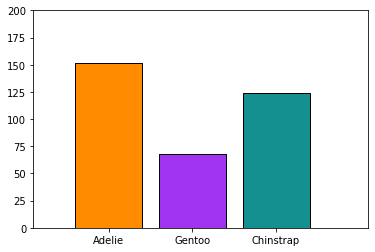

In [12]:
fig, ax = plt.subplots()

artist = bar.Bar(table, fts, orientation='v')
ax.add_artist(artist)
ax.set(xlim = (-0.5, 3.5), 
       ylim = (0,200),
       xticks = [.4, 1.4, 2.4],
       xticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_v.png")

In [ ]:
fig, ax = plt.subplots()

artist = bar.Bar(table, fts, orientation='horizontal')
ax.add_artist(artist)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (0,200),
       yticks = [.4, 1.4, 2.4],
       yticklabels = table.view(None)['index'])
fig.savefig(spath/"bar_h.png")

# grouped bar

In [ ]:
penguins

In [ ]:
df = penguins.groupby(['island','species']).count()['sex'].reset_index()

In [ ]:
tb = df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().fillna(0)

In [ ]:
tb['Adelie_s'] = 'Adelie'
tb['Chinstrap_s'] = 'Chinstrap'
tb['Gentoo_s'] = 'Gentoo'

In [ ]:
 df.pivot(index=['island'], columns=['species'], values = 'sex').reset_index().plot.bar(stacked=True)

In [ ]:
bt = iris.DataFrame(tb)

In [ ]:
bt.view()

In [ ]:
# {channel: column, transformer: {name, multivariate}}
gts = {'position': ('island', position.Nominal({'Biscoe':0, 'Dream':1, 'Torgersen':2})),
        'length':(['Adelie', 'Chinstrap', 'Gentoo'], position.Identity()),
        'facecolors': (['Adelie_s', 'Chinstrap_s', 'Gentoo_s'], 
                        color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'}))}
        

In [ ]:
gts.items()

In [ ]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=True)
ax.add_artist(artist)
_ = ax.set(ylim = (0, 170), 
       xlim = (-.5, 3.5),   
             xticks = [.4, 1.4, 2.4],
       xticklabels = ['Biscoe', 'Dream', 'Torgerson'],)
fig.savefig(spath/"bar_stacked.png")

In [ ]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='h', stacked=True)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 140), 
       ylim = (-.5, 3.5),   
          xticks = [.4, 1.4, 2.4],
       xticklabels = ['Biscoe', 'Dream', 'Torgerson'])

In [ ]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=False)
ax.add_artist(artist)
_ = ax.set(ylim = (0, 140), 
       xlim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0],
       xticks = [.4, 1.25, 2.25],
       xticklabels = ['Biscoe', 'Dream', 'Torgerson'])
fig.savefig(spath/"bar_grouped.png")

In [ ]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='h', stacked=False)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 140), 
       ylim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

In [ ]:
gts = {'position': ('island', position.Nominal({'Biscoe':0, 'Dream':1, 'Torgersen':2}))}
mgts = {'length':(['Adelie', 'Chinstrap', 'Gentoo'], position.Identity()),
        'facecolors': (['Adelie_s', 'Chinstrap_s', 'Gentoo_s'], 
                        color.Categorical({'Adelie':'#FF8C00',
                                                'Gentoo':'#159090',
                                                'Chinstrap':'#A034F0'}))}
        

In [ ]:
fig, ax = plt.subplots()
artist = bar.StackedBar(bt, gts, mgts, orientation='h')
ax.add_artist(artist)